In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import itertools
from itertools import product
from datetime import datetime

In [3]:
df1 = pd.read_csv("datasets/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths_20250923.csv")
df2 = pd.read_csv("datasets/New_York_State_Statewide_COVID-19_Testing_20250923.csv")

## Dataset 1 Visualization
file name : COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths_20250923.csv

In [4]:
df1.head(10)

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,03/05/2020,3,0,14,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,03/06/2020,8,0,8,0,3,3,5,0,2,...,1,0,1,0,0,0,0,0,0,0
7,03/07/2020,7,0,8,0,3,3,6,0,0,...,1,0,0,0,0,0,0,0,0,0
8,03/08/2020,21,0,18,0,6,6,8,0,3,...,1,0,0,0,0,0,0,0,0,0
9,03/09/2020,57,0,37,0,15,15,13,0,4,...,3,0,2,0,0,1,1,1,0,0


In [5]:
df1.describe()

,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,...,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,1501.129319,355.720632,112.184600,23.260612,1500.823791,1856.298618,112.159921,23.267522,250.610563,69.991115,...,105.093781,26.149556,6.846989,1.423988,26.131787,105.071570,131.194472,6.848963,1.377591,210.863771
std,3836.168151,495.562240,195.062883,75.714651,3547.155137,3977.705276,191.968971,74.826063,709.166819,112.210050,...,252.977401,29.990136,9.598471,3.576107,27.988938,234.158031,256.947584,9.189736,3.404437,3582.022547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.250000,94.000000,27.000000,2.000000,244.000000,345.250000,28.000000,2.000000,40.000000,15.000000,...,15.000000,7.000000,1.000000,0.000000,7.000000,16.000000,23.000000,2.000000,0.000000,0.000000
50%,534.000000,210.000000,53.000000,5.000000,559.500000,775.500000,53.000000,5.000000,86.000000,39.000000,...,36.000000,16.500000,4.000000,0.000000,17.000000,36.000000,57.000000,4.000000,0.000000,0.000000
75%,1644.500000,457.750000,117.000000,15.000000,1646.000000,2143.500000,116.000000,14.000000,250.000000,90.000000,...,119.000000,35.000000,9.000000,1.000000,36.000000,124.000000,161.750000,8.000000,1.000000,0.000000
max,55058.000000,5881.000000,1858.000000,832.000000,39531.000000,43989.000000,1687.000000,775.000000,10564.000000,1575.000000,...,3720.000000,316.000000,83.000000,43.000000,233.000000,2689.000000,2909.000000,72.000000,34.000000,61030.000000


In [6]:
len(df1)

2026

In [7]:
df1.columns

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG',
       'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT',
       'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG',
       'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG',
       'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG',
       'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG',
       'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7

In [8]:
df1 = df1[df1.columns[:9]]

In [9]:
len(df1.columns)

9

In [10]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].unique()

In [11]:
unique_values

{'date_of_interest': array(['02/29/2020', '03/01/2020', '03/02/2020', ..., '09/13/2025',
        '09/14/2025', '09/15/2025'], dtype=object),
 'CASE_COUNT': array([  1,   0,   5, ..., 199, 157, 258]),
 'PROBABLE_CASE_COUNT': array([   0,    1,    2,    4,    5,    3,    7,   15,   12,   18,   44,
          46,   51,   66,   92,   89,  109,  179,  203,  181,  240,  234,
         214,  208,  205,  186,  180,  199,  155,  122,  144,  105,  123,
          96,  101,  103,   88,   85,   60,   55,   52,   38,   37,   30,
          47,   35,   33,   31,   25,   11,   17,    9,   16,   19,    8,
           6,   14,   13,   10,   22,   20,   24,   26,   21,   27,   23,
          28,   34,   39,   29,   32,   50,   53,   56,   65,   71,   57,
          48,   41,   83,   79,   82,   42,   64,  116,   72,   76,   91,
          45,   49,   69,  111,  140,  134,  128,  107,  120,  168,  160,
         167,  173,  137,  152,  218,  231,  224,  225,  237,  329,  302,
         378,  393,  420,  357,  369,

In [12]:
cases = df1[df1["CASE_COUNT"] > 10]

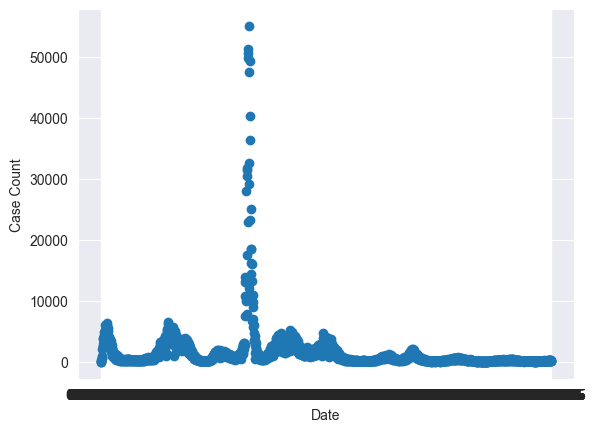

In [13]:
x = cases["date_of_interest"]
y = cases["CASE_COUNT"]

plt.scatter(x, y)
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.show()

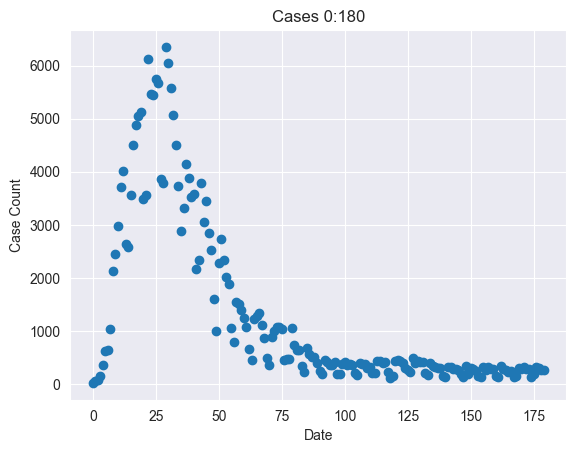

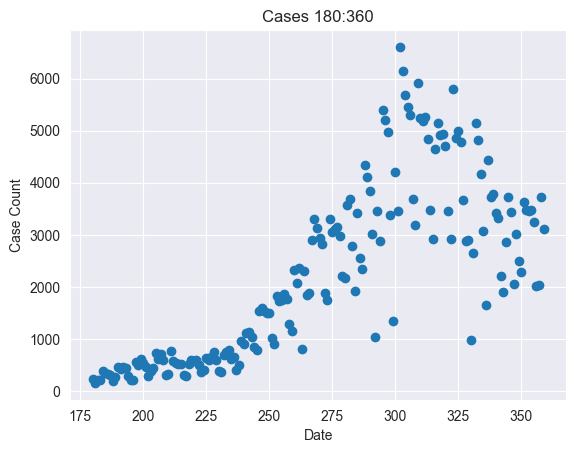

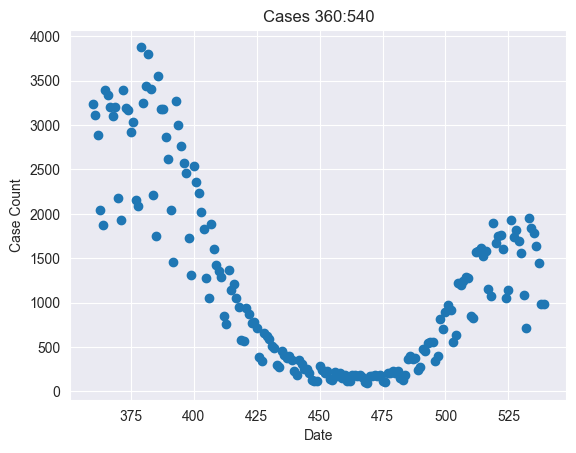

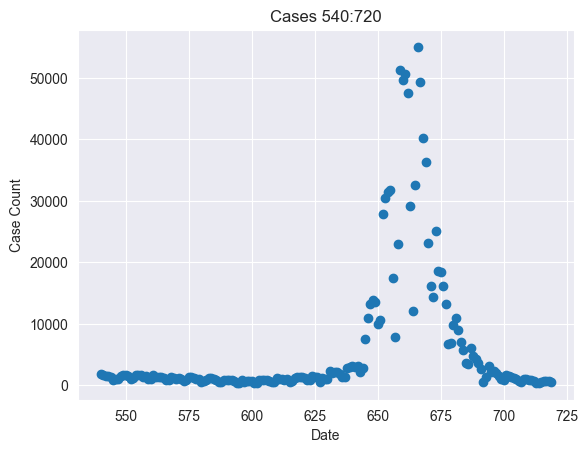

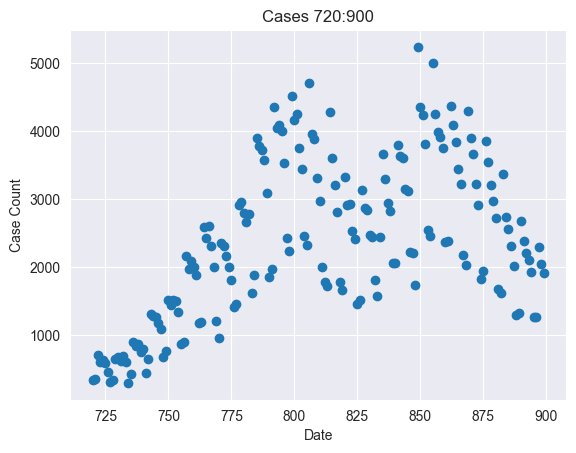

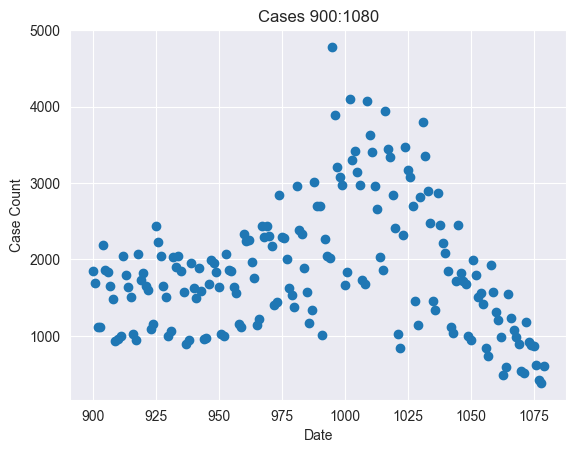

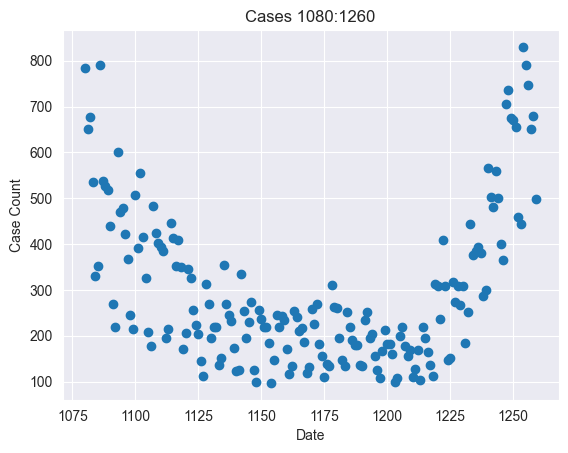

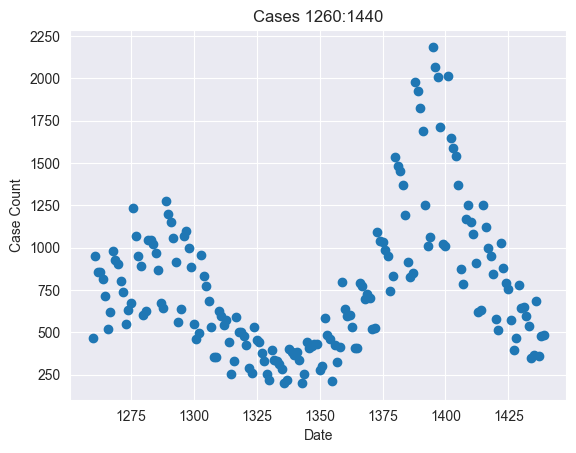

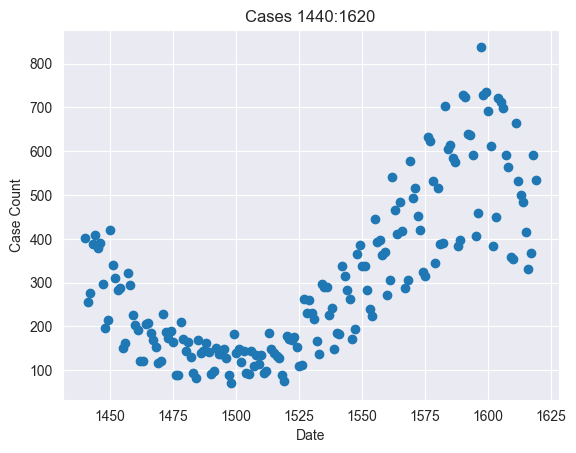

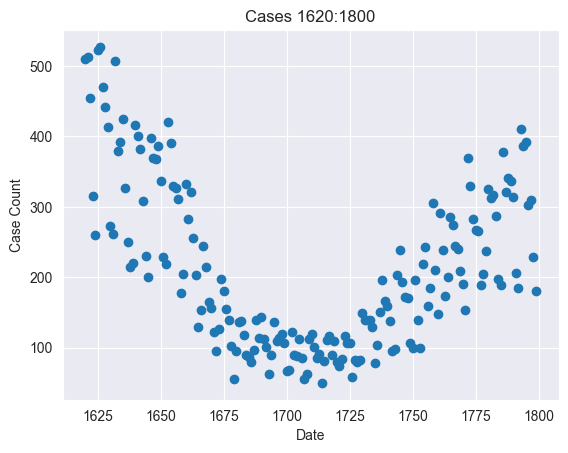

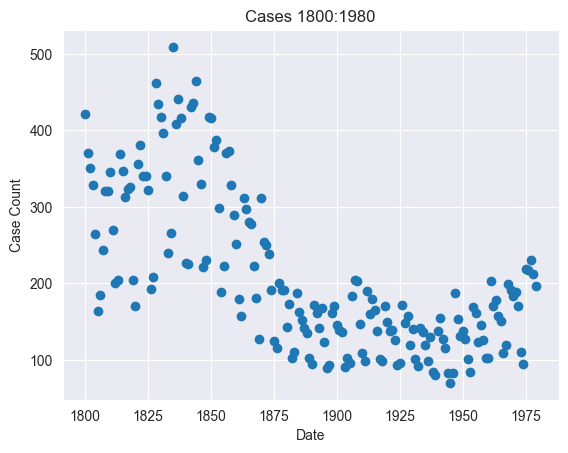

In [14]:
even_cases = cases[:1980]
for i in range(0, len(even_cases), 180):
    chunk = even_cases[i:i+180]   # take 180 rows at a time

    x = [j for j in range(i, i+180)]
    y = chunk["CASE_COUNT"]

    plt.scatter(x, y)
    plt.xlabel("Date")
    plt.ylabel("Case Count",)
    plt.title(f"Cases {i}:{i+180}")  # optional
    plt.show()

## Dataset 2 Visualization
file name : New_York_State_Statewide_COVID-19_Testing_20250923.csv

In [15]:
df2[df2["Geography Description"] == "STATEWIDE"].head(200)

,Test Date,Geography Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
72,09/16/2025,STATEWIDE,STATEWIDE,1212,6.10,5.09,812,4.09,400,2.01
145,09/15/2025,STATEWIDE,STATEWIDE,1286,6.47,4.98,833,4.19,453,2.28
218,09/14/2025,STATEWIDE,STATEWIDE,726,3.65,4.89,424,2.13,302,1.52
291,09/13/2025,STATEWIDE,STATEWIDE,705,3.55,4.78,403,2.03,302,1.52
364,09/12/2025,STATEWIDE,STATEWIDE,1013,5.10,4.71,648,3.26,365,1.84
...,...,...,...,...,...,...,...,...,...,...
14307,03/05/2025,STATEWIDE,STATEWIDE,1208,6.17,5.07,765,3.91,443,2.26
14380,03/04/2025,STATEWIDE,STATEWIDE,1238,6.33,4.95,783,4.00,455,2.32
14453,03/03/2025,STATEWIDE,STATEWIDE,1220,6.23,4.91,770,3.93,450,2.30
14526,03/02/2025,STATEWIDE,STATEWIDE,667,3.41,4.98,368,1.88,299,1.53


In [16]:
df2.describe()

,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
count,147898.000000,147898.000000,147898.000000,147898.000000,147898.000000,147898.000000,147898.000000
mean,171.584673,17.948091,17.940893,136.602070,14.700867,34.982603,3.247234
std,1306.626972,35.319806,32.044137,1098.534858,29.549534,217.890995,7.660328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.390000,2.810000,2.000000,1.880000,0.000000,0.000000
50%,12.000000,7.470000,8.120000,10.000000,5.860000,1.000000,0.870000
75%,60.000000,20.910000,21.230000,47.000000,17.020000,10.000000,3.447500
max,121323.000000,899.240000,669.590000,102922.000000,792.980000,18401.000000,225.530000


In [17]:
len(df2.columns)

10

In [18]:
df2 = df2.iloc[::-1]

In [19]:
unique_values_df2 = {}
for col in df2.columns:
    unique_values_df2[col] = df2[col].unique()

In [20]:
unique_values_df2

{'Test Date': array(['03/01/2020', '03/02/2020', '03/03/2020', ..., '09/14/2025',
        '09/15/2025', '09/16/2025'], dtype=object),
 'Geography Description': array(['STATEWIDE', 'Western New York', 'Southern Tier', 'North Country',
        'New York City', 'Mohawk Valley', 'Mid-Hudson', 'Long Island',
        'Finger Lakes', 'Central New York', 'Capital Region', 'Yates',
        'Wyoming', 'Westchester', 'Wayne', 'Washington', 'Warren',
        'Ulster', 'Tompkins', 'Tioga', 'Sullivan', 'Suffolk', 'Steuben',
        'St. Lawrence', 'Seneca', 'Schuyler', 'Schoharie', 'Schenectady',
        'Saratoga', 'Rockland', 'Richmond', 'Rensselaer', 'Queens',
        'Putnam', 'Otsego', 'Oswego', 'Orleans', 'Orange', 'Ontario',
        'Onondaga', 'Oneida', 'Niagara', 'New York', 'Nassau',
        'Montgomery', 'Monroe', 'Madison', 'Livingston', 'Lewis', 'Kings',
        'Jefferson', 'Herkimer', 'Hamilton', 'Greene', 'Genesee', 'Fulton',
        'Franklin', 'Essex', 'Erie', 'Dutchess', 'Delaware

In [21]:
len(unique_values_df2["Test Date"])

2026

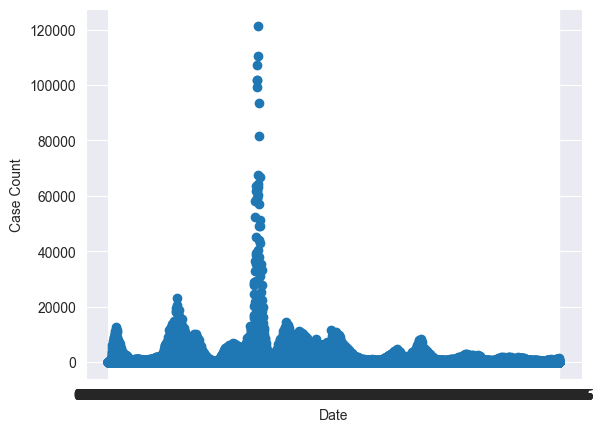

In [22]:
x = df2["Test Date"]
y = df2["Total New Positives"]

plt.scatter(x, y)
plt.xlabel("Date")
plt.ylabel("Case Count",)
plt.show()


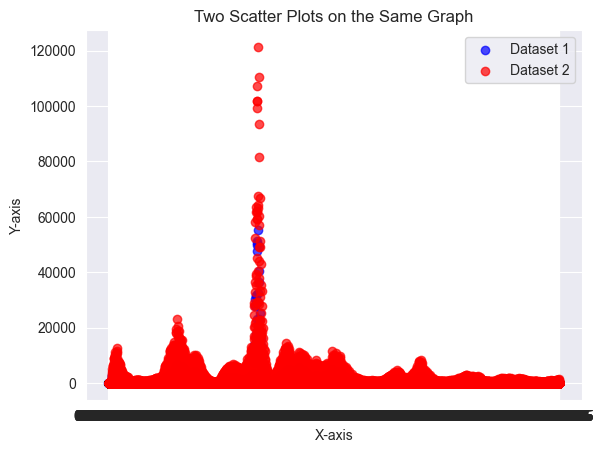

In [23]:
fig, ax = plt.subplots()

x_df1 = df1["date_of_interest"]
y_df1 = df1["CASE_COUNT"]

x_df2 = df2["Test Date"]
y_df2 = df2["Total New Positives"]

# Plot the first scatter plot
ax.scatter(x_df1, y_df1, color='blue', label='Dataset 1', alpha=0.7)

# Plot the second scatter plot on the same axes
ax.scatter(x_df2, y_df2, color='red', label='Dataset 2', alpha=0.7)

# Add labels and a title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Two Scatter Plots on the Same Graph')

# Add a legend to distinguish between the datasets
ax.legend()

# Display the plot
plt.show()

# Policies for City Data

In [24]:
df1[["date_of_interest", "CASE_COUNT"]]

,date_of_interest,CASE_COUNT
0,02/29/2020,1
1,03/01/2020,0
2,03/02/2020,0
3,03/03/2020,1
4,03/04/2020,5
...,...,...
2021,09/11/2025,258
2022,09/12/2025,235
2023,09/13/2025,164
2024,09/14/2025,142


In [25]:
len(df1["date_of_interest"].unique()) == len(df1)  # making sure no repeating days

True

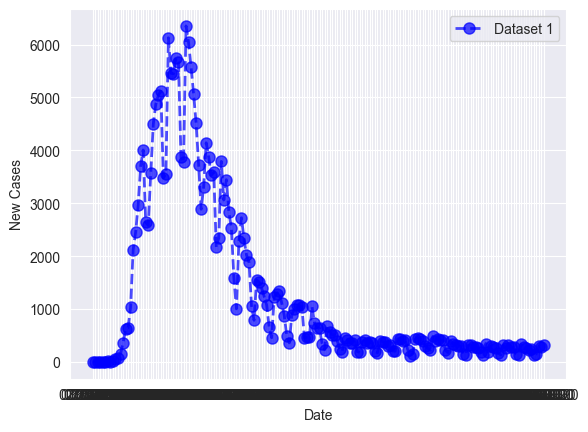

In [26]:
date = df1["date_of_interest"].iloc[:180]
new_cases = df1["CASE_COUNT"].iloc[:180]
# Plot the first scatter plot
plt.plot(date, new_cases, color='blue', label='Dataset 1', alpha=0.7, linestyle='--', marker='o', markersize=8, linewidth=2)

plt.xlabel('Date')
plt.ylabel('New Cases')

plt.legend()

plt.show()

In [27]:
def isolate_data(df,date_col,cases_col):

    return df[[date_col,cases_col]]


In [28]:
def date_range_selector(df, start_date, end_date, date_col):

    df = df.copy()
    df.loc[:, date_col] = pd.to_datetime(df[date_col], format='%m/%d/%Y', errors='coerce',dayfirst=True)

    start_dt = pd.to_datetime(start_date, format='%m/%d/%Y',dayfirst=True)
    end_dt = pd.to_datetime(end_date, format='%m/%d/%Y',dayfirst=True)

    df = df.loc[(df[date_col] >= start_dt) & (df[date_col] <= end_dt)]

    return df


In [29]:
date_col = "date_of_interest"
cases_col = "CASE_COUNT"
df_isolated = isolate_data(df1,date_col,cases_col)

start_date = "03/06/2020"
end_date = "09/02/2020"
df_date= date_range_selector(df1,start_date,end_date,date_col)

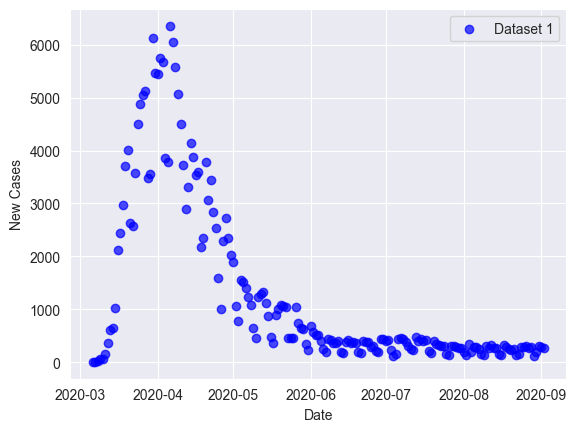

In [30]:
date = df_date[date_col]
new_cases = df_date[cases_col]
# Plot the first scatter plot
plt.scatter(date, new_cases, color='blue', label='Dataset 1', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('New Cases')

plt.legend()

plt.show()

In [46]:
def plot_policy_breaks(policies, plt):
    policy_dates = policies["policy_dates"]

    for pol_date in policy_dates:
        random_color = (rd.random(), rd.random(), rd.random())
        plt.axvline(x=pol_date, color=random_color, linestyle='--', label=pol_date)

    current_x_ticks = list(range(1, 181, 30))
    if 180 not in current_x_ticks:
        current_x_ticks.append(180)

    x_tick_labels = [
        f'{int(tick)}' if (tick in [1, 180] or i % 1 == 0) else ''
        for i, tick in enumerate(current_x_ticks)
    ]

    plt.xticks(current_x_ticks, x_tick_labels)
    return plt



In [47]:
policies = {
    "policy_names": ["Mask Mandate","Tri-State Travel Quarantine"],
    "policy_dates": [ "04/17/2020","06/24/2020"],
}

ConversionError: Failed to convert value(s) to axis units: '04/17/2020'

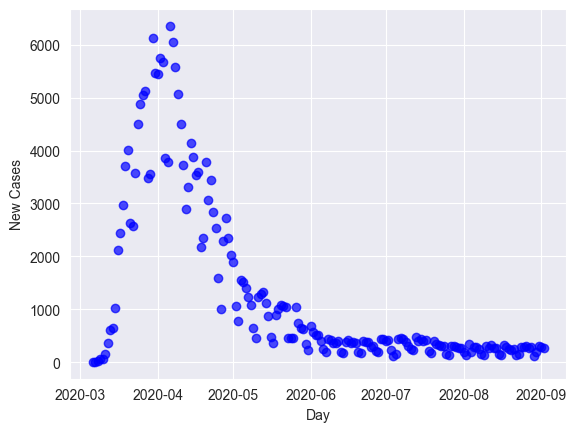

In [48]:
date = df_date[date_col]
new_cases = df_date[cases_col]

plt.scatter(date, new_cases, color='blue', label='Dataset 1', alpha=0.7)

plt.xlabel('Day')
plt.ylabel('New Cases')

plt = plot_policy_breaks(policies,plt)

plt.legend()

plt.show()

In [49]:

# Generate all policy combinations (00, 01, 10, 11)
def policy_models(policies):
    policy_names = policies["policy_names"]
    combos = [
        dict(zip(policy_names, combo))
        for combo in product([False, True], repeat=len(policy_names))
    ]
    return combos



In [51]:
combos = policy_models(policies)

In [61]:
for idx,combo in enumerate(combos):
    print(combo)

{'Mask Mandate': False, 'Tri-State Travel Quarantine': False}
{'Mask Mandate': False, 'Tri-State Travel Quarantine': True}
{'Mask Mandate': True, 'Tri-State Travel Quarantine': False}
{'Mask Mandate': True, 'Tri-State Travel Quarantine': True}
